Colab 可以透過兩種方式存取 Google Drive 的檔案：

**1. 透過檔案共用連結**

  一般來說，Google Drive 的檔案連結會是類似下面的結構：

https://drive.google.com/file/d/1fGStFYMLXJgKAuqUkLMoPVNfyqT8DLQm/view?usp=sharing
  
  其中 "open?id=" 後面的那一串亂碼稱為 **file_id**

  在 colab 中，我們可以直接用 **file_id** 下載檔案，優點是這個過程不需要再手動輸入任何訊息，但缺點是下載下來的檔案在程式執行完畢後就會消失，也就是每一次都必須重新下載，使得執行時間增加。

In [ ]:
# 下載 file_id 為 "1fGStFYMLXJgKAuqUkLMoPVNfyqT8DLQm" 的檔案，並將它命名為 Minori.jpg
!gdown --id '1fGStFYMLXJgKAuqUkLMoPVNfyqT8DLQm' --output Minori.jpg
# 列出目前目錄下所有的檔案
!ls

Downloading...
From: https://drive.google.com/uc?id=1fGStFYMLXJgKAuqUkLMoPVNfyqT8DLQm
To: /content/gdrive/My Drive/Colab Notebooks/Minori.jpg
100% 219k/219k [00:00<00:00, 28.7MB/s]
iris.xlsx   人工智慧、機器學習、深度學習簡介.ipynb  生成式深度學習.ipynb
Minori.jpg  機器學習基本概念.ipynb


**2. 掛載自己的 Google Drive**

  透過 Google 提供的套件，我們可以讓 Colab 上的程式直接讀取自己的雲端硬碟。
  這個方法的好處是只要檔案存在於自己的雲端硬碟，就隨時都可以直接存取；相對地，缺點就是使用者得手動將檔案加入，並且在程式運行時要輸入連結 Google Drive 所需要的授權碼。

In [ ]:
# OpenCV 套件，和 Google Drive 無關
import cv2
# import Google Drive 套件
from google.colab import drive
# 將自己的雲端硬碟掛載上去
drive.mount('/content/gdrive')
# 透過 gdrive/My Drive/... 來存取檔案
img = cv2.imread('gdrive/My Drive/Minori.jpg')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


---
### 實例 <a href="https://archive.ics.uci.edu/ml/datasets/Iris" target="_blank" title="Iris data set">Iris data set</a>
#### 問題描述: 根據花的萼片(sepal)長度與寬度及花瓣(petal)長度與寬度，辨識是下面三種鳶尾屬植物中的哪一種。
<br>
<div>
    <img src="attachment:iris.png" width="500">
</div>


#### 問題定義:找到一個分類器$f(x_{1},x_{2},x_{3},x_{4}):\mathbb{R}^{4}\rightarrow \mathbb{R}^{3}$ (or $\{0,1,2\}$)，根據花的萼片(sepal)長度與寬度及花瓣(petal)長度與寬度(分別為$x_{1},x_{2},x_{3},x_{4}$)，輸出此花的種類。

分類器是$f(x_{1},x_{2},x_{3},x_{4}):\mathbb{R}^{4}\rightarrow \mathbb{R}^{3}$其輸出通常與事後機率$p(山鳶尾|x_{1},x_{2},x_{3},x_{4})$, $p(變色鳶尾|x_{1},x_{2},x_{3},x_{4})$, $p(維吉尼亞鳶尾|x_{1},x_{2},x_{3},x_{4})$有關
\begin{equation}
f(x_{1},x_{2},x_{3},x_{4}) = \left[
\begin{array}{l}
p(山鳶尾|x_{1},x_{2},x_{3},x_{4})\\
p(變色鳶尾|x_{1},x_{2},x_{3},x_{4})\\
p(維吉尼亞鳶尾|x_{1},x_{2},x_{3},x_{4})\\
\end{array}
\right]
\end{equation}
注意$p(山鳶尾|x_{1},x_{2},x_{3},x_{4})+p(變色鳶尾|x_{1},x_{2},x_{3},x_{4})+p(維吉尼亞鳶尾|x_{1},x_{2},x_{3},x_{4})=1$。因此$f(x_{1},x_{2},x_{3},x_{4})$輸出裡最大那個成份所對應的花的類別就是辨識結果。分類器是$f(x_{1},x_{2},x_{3},x_{4}):\mathbb{R}^{4}\rightarrow \{0,1,2\}$的形式，通常也可以取得事後機率的估計。

#### 檢視步驟1與2的結果
假設經步驟1與2處理後，資料擺放在'iris.xlsx'此excel檔案裏。注意要擺放'iris.xlsx'在這個.ipynb檔案同一個目錄下。
<div>
    <img src="attachment:iris_dataset.png" width="250">
</div> 

In [ ]:
import sklearn.datasets as ds
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/Colab Notebooks
#讀入資料
iris_df = pd.read_excel('iris.xlsx')
print('total # of examples:{}'.format(len(iris_df)))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks
total # of examples:150


顯示前10筆資料
也可以使用指令 iris_df.head(10)，iris_df.head()顯示前5筆資料。

In [ ]:
iris_df[:10]

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
#觀察第90筆資料至第99筆資料
iris_df[90:100]

,sepal_len,sepal_wid,petal_len,petal_wid,class
90,5.5,2.6,4.4,1.2,Iris-versicolor
91,6.1,3.0,4.6,1.4,Iris-versicolor
92,5.8,2.6,4.0,1.2,Iris-versicolor
93,5.0,2.3,3.3,1.0,Iris-versicolor
94,5.6,2.7,4.2,1.3,Iris-versicolor
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor


In [ ]:
#觀察第140筆資料至最後
iris_df[140:]

,sepal_len,sepal_wid,petal_len,petal_wid,class
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
#只揀選兩欄來觀察
iris_df.iloc[:10,[1,0]]

,sepal_wid,sepal_len
0,3.5,5.1
1,3.0,4.9
2,3.2,4.7
3,3.1,4.6
4,3.6,5.0
5,3.9,5.4
6,3.4,4.6
7,3.4,5.0
8,2.9,4.4
9,3.1,4.9


觀察數值型態資料統計值

In [ ]:
iris_df.describe()

,sepal_len,sepal_wid,petal_len,petal_wid
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


可以檢視特徵有多少不同的值
顯示有幾種不同的species，就是看class欄有幾個不同的值

對數值型態資料可顯示其直方圖

In [ ]:
print(iris_df['class'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


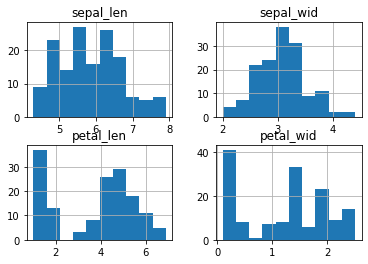

In [ ]:
iris_df.hist()
plt.show()

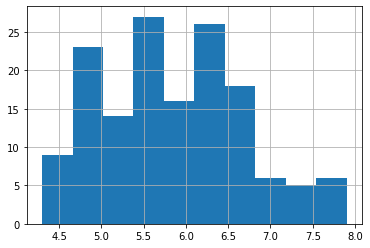

In [ ]:
iris_df['sepal_len'].hist(bins=10)

可以檢視特徵其不同的值出現次數

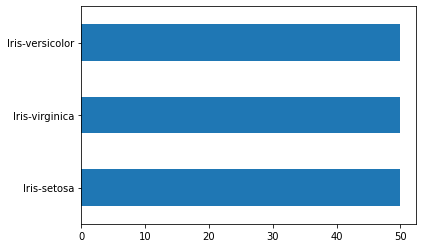

In [ ]:
iris_df['class'].value_counts().plot(kind='barh')

Text(0.5, 0, 'average sepal length (cm)')

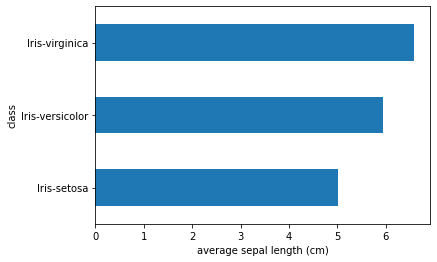

In [ ]:
iris_df.groupby('class')['sepal_len'].mean().plot(kind='barh').set_xlabel('average sepal length (cm)')

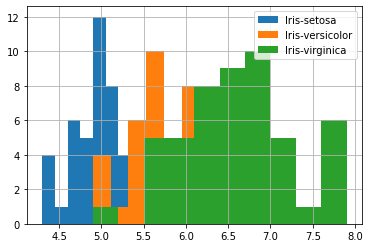

In [ ]:
fig,ax=plt.subplots()
p=iris_df.groupby('class')['sepal_len'].hist(ax=ax)
plt.legend([x for x in p.keys()])
plt.show()

根據每一對特徵與species描繪描繪資料分布

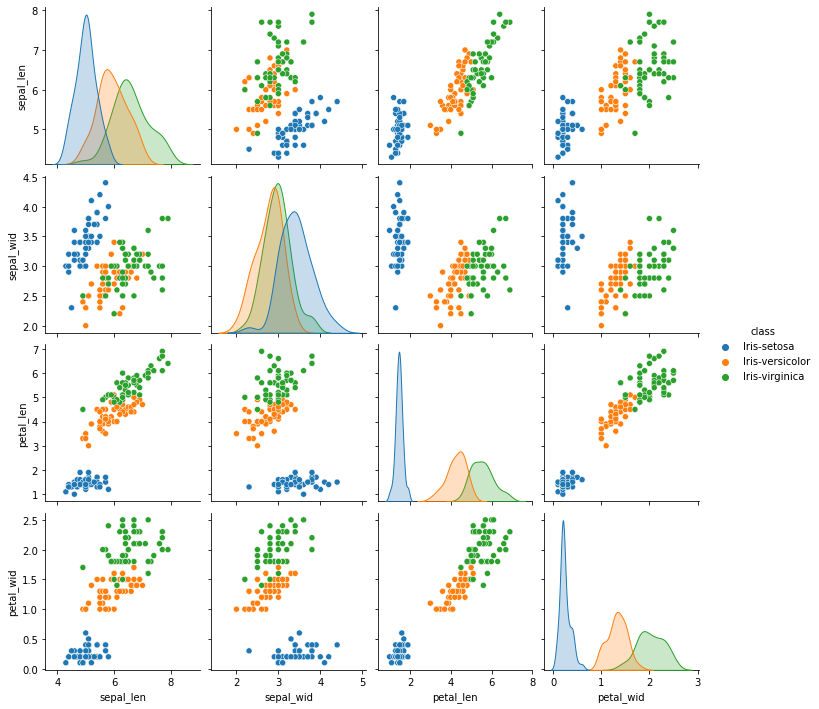

In [ ]:
import seaborn as sns
sns.pairplot(iris_df,hue="class"); # hue="class" 顏色由species欄(在此資料集是樣本的類別)決定